## Importando los datos

In [1]:
import pandas as pd
# Importando los datos
datos = pd.read_csv('DataBase/flights.csv')
datos.shape

(71175, 11)

## Análisis exploratorio

In [2]:
datos.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [4]:
datos.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [5]:
# Resumen de variables categoricas
datos.describe(include='O')

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


## Análisis gráfico del conjunto de datos

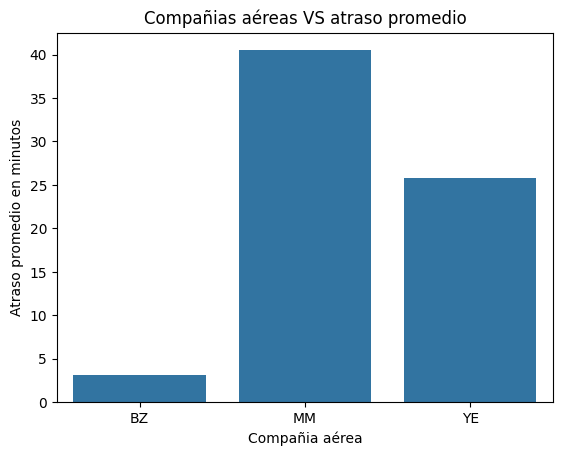

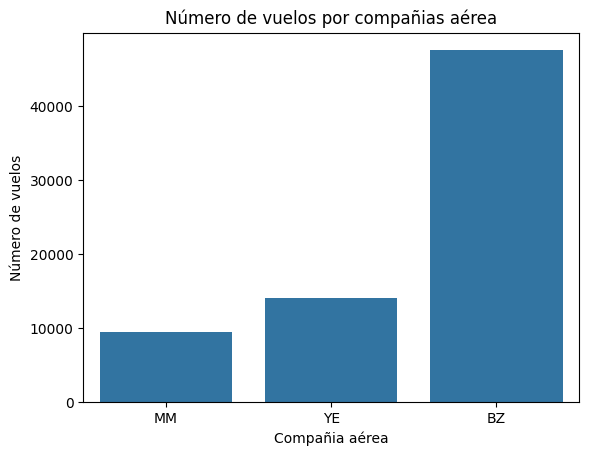

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

avg_delay = datos.groupby('airline')['delay'].mean().reset_index()
sns.barplot(x='airline',y='delay',data=avg_delay)
plt.title('Compañias aéreas VS atraso promedio')
plt.xlabel('Compañia aérea')
plt.ylabel('Atraso promedio en minutos')
plt.show()

sns.countplot(data=datos,x='airline')
plt.title('Número de vuelos por compañias aérea')
plt.xlabel('Compañia aérea')
plt.ylabel('Número de vuelos')
plt.show()

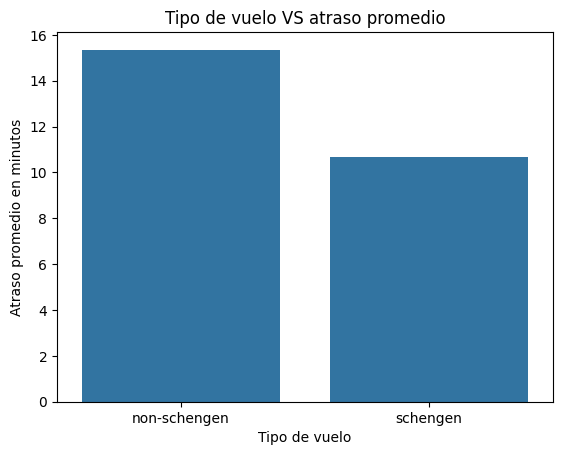

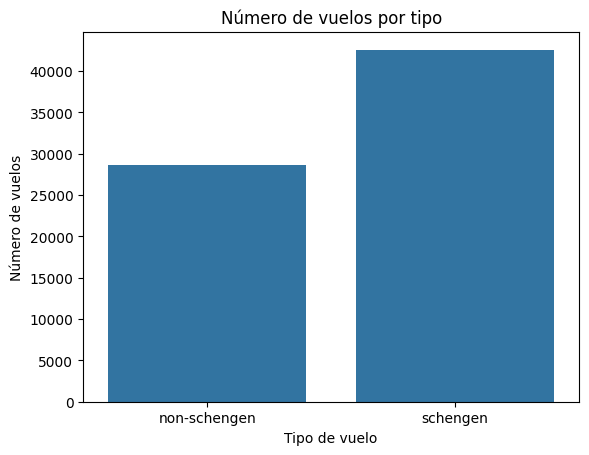

In [7]:
avg_delay = datos.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(x='schengen',y='delay',data=avg_delay)
plt.title('Tipo de vuelo VS atraso promedio')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Atraso promedio en minutos')
plt.show()

sns.countplot(data=datos,x='schengen')
plt.title('Número de vuelos por tipo')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Número de vuelos')
plt.show()

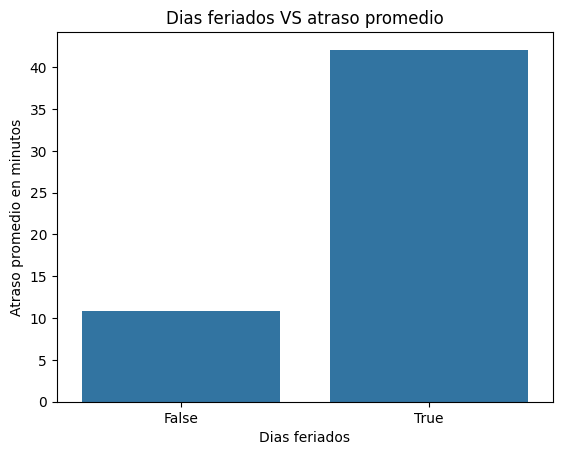

In [8]:
avg_delay = datos.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday',y='delay',data=avg_delay)
plt.title('Dias feriados VS atraso promedio')
plt.xlabel('Dias feriados')
plt.ylabel('Atraso promedio en minutos')
plt.show()

In [9]:
datos['aircraft_type'].value_counts().index

Index(['Airbus A320', 'Airbus A330', 'Boeing 787', 'Embraer E175',
       'Boeing 737', 'Boeing 777'],
      dtype='object', name='aircraft_type')

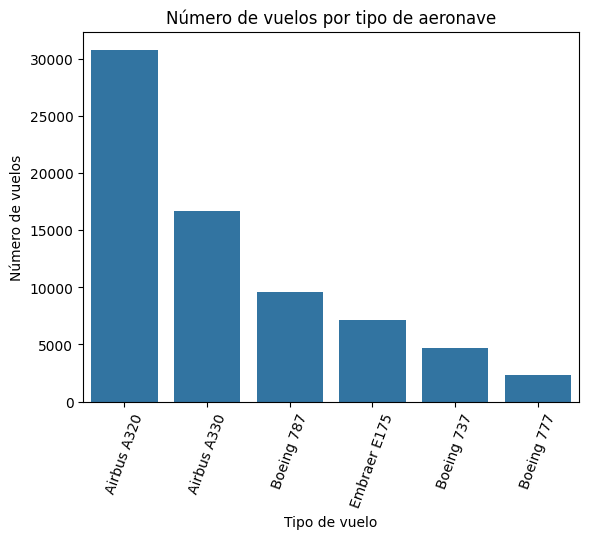

In [10]:
order = datos['aircraft_type'].value_counts().index
sns.countplot(data=datos,x='aircraft_type',order=order)
plt.title('Número de vuelos por tipo de aeronave')
plt.xticks(rotation=70)
plt.xlabel('Tipo de vuelo')
plt.ylabel('Número de vuelos')
plt.show()

## Distribución de los datos

<Axes: xlabel='arrival_time', ylabel='Count'>

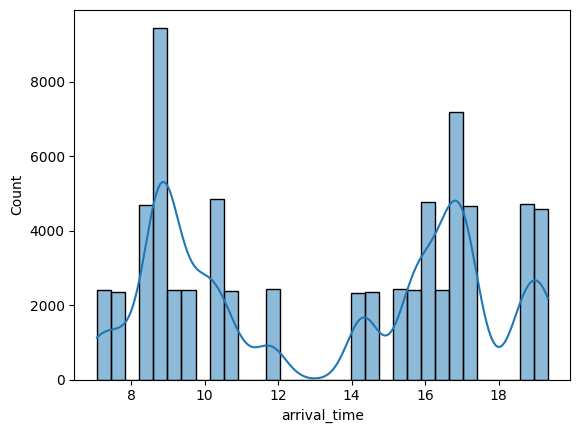

In [11]:
sns.histplot(data=datos,x='arrival_time',kde=True)

## [Regla de Freedman-Diaconis](https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule)
$$
\text{Bin width} = 2 \cdot \frac{\text{IQR}(x)}{\sqrt[3]{n}}
$$

In [12]:
import numpy as np
def ancho_bin(df,columna):
    q75, q25 = np.percentile(df[columna],[75,25])
    iqr = q75 - q25
    ancho = 2 * iqr * np.power(len(df[columna]),-1/3)
    return ancho

<Axes: xlabel='arrival_time', ylabel='Count'>

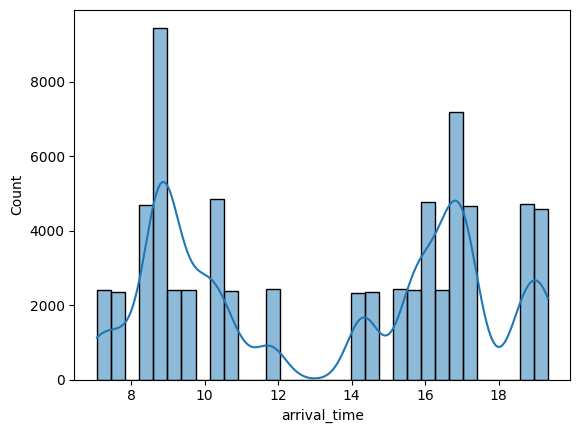

In [13]:
binwidth = ancho_bin(datos,'arrival_time')
sns.histplot(data=datos,x='arrival_time',kde=True,binwidth=binwidth)

<Axes: xlabel='departure_time', ylabel='Count'>

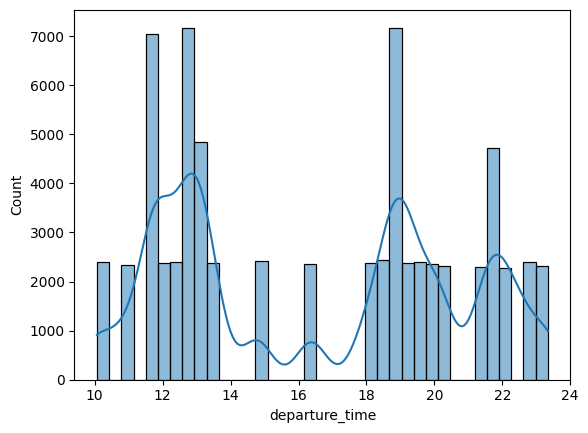

In [14]:
binwidth = ancho_bin(datos,'departure_time')
sns.histplot(data=datos,x='departure_time',kde=True,binwidth=binwidth)

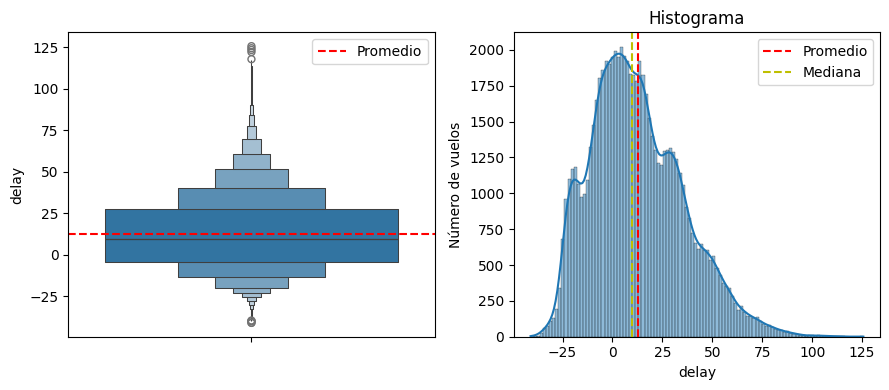

In [15]:
atraso_promedio = datos['delay'].mean()
atraso_mediana = datos['delay'].median()

fig,ax = plt.subplots(1,2,figsize=(9,4))

sns.boxenplot(data=datos,y='delay',ax=ax[0])
ax[0].axhline(y=atraso_promedio,color='r',linestyle='--',label='Promedio')
ax[0].legend()

binwidth = ancho_bin(datos,'delay')
sns.histplot(data=datos,x='delay',ax=ax[1],kde=True,binwidth=binwidth)
plt.ylabel('Número de vuelos')
plt.grid(False)
ax[1].set_title('Histograma')
ax[1].axvline(x=atraso_promedio,color='r',linestyle='--',label='Promedio')
ax[1].axvline(x=atraso_mediana,color='y',linestyle='--',label='Mediana')
ax[1].legend()

plt.tight_layout()
plt.show()


## Nuevas columnas

In [16]:
datos.columns

Index(['flight_id', 'airline', 'aircraft_type', 'schengen', 'origin',
       'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay'],
      dtype='object')

In [17]:
datos['date'] = datos['year'].astype(str)  + '-' + (datos['day']+1).astype(str)
datos['date'] = pd.to_datetime(datos['date'],format='%Y-%j')
datos.tail(2)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844,2022-12-31
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648,2022-12-31


In [18]:
datos['is_weekend'] = datos['date'].dt.weekday.isin([5,6])
datos['day_name'] = datos['date'].dt.day_name()
datos.sample(5)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
25289,12,YE,Airbus A330,schengen,TZF,17.313731,21.313731,225,2014,False,19.400922,2014-08-14,False,Thursday
42216,27,BZ,Airbus A320,schengen,AUZ,14.376052,16.376052,259,2017,False,21.228305,2017-09-17,True,Sunday
39335,23,YE,Embraer E175,schengen,TCY,18.801235,21.801235,67,2017,False,9.402666,2017-03-09,False,Thursday
3111,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,207,2010,False,-16.292806,2010-07-27,False,Tuesday
5393,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,359,2010,False,13.838009,2010-12-26,True,Sunday


In [19]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   flight_id       71175 non-null  int64         
 1   airline         71175 non-null  object        
 2   aircraft_type   71175 non-null  object        
 3   schengen        71175 non-null  object        
 4   origin          71175 non-null  object        
 5   arrival_time    71175 non-null  float64       
 6   departure_time  71175 non-null  float64       
 7   day             71175 non-null  int64         
 8   year            71175 non-null  int64         
 9   is_holiday      71175 non-null  bool          
 10  delay           71175 non-null  float64       
 11  date            71175 non-null  datetime64[ns]
 12  is_weekend      71175 non-null  bool          
 13  day_name        71175 non-null  object        
dtypes: bool(2), datetime64[ns](1), float64(3), int64(3), o

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
datos['schengen'] = datos['schengen'].replace({'non-schengen':0,'schengen':1})
datos['is_holiday'] = datos['is_holiday'].replace({False:0,True:1})
datos['is_weekend'] = datos['is_weekend'].replace({False:0,True:1})
datos.sample(3)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
40796,8,BZ,Airbus A320,1,ZQO,15.729617,18.729617,164,2017,0,-5.006926,2017-06-14,0,Wednesday
45060,16,MM,Airbus A320,0,CSF,17.041281,20.041281,84,2018,0,60.328403,2018-03-26,0,Monday
424,7,MM,Boeing 787,1,TZF,8.564949,13.564949,28,2010,0,45.386616,2010-01-29,0,Friday


In [22]:
categoricas = ['airline', 'aircraft_type', 'origin', 'day_name']
pd.get_dummies(data=datos,columns=categoricas, dtype=int).head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0
3,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0


In [23]:
datos_codificados = pd.get_dummies(data=datos,columns=categoricas, dtype=int)
datos_codificados.sample(5)

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
39748,4,1,11.781391,14.781391,94,2017,0,-18.980450,2017-04-05,0,...,1,0,0,0,0,0,0,0,0,1
48142,23,1,18.801235,21.801235,289,2018,0,13.379918,2018-10-17,0,...,1,0,0,0,0,0,0,0,0,1
51434,1,0,15.496519,18.496519,143,2019,0,0.897890,2019-05-24,0,...,0,0,0,1,0,0,0,0,0,0
27902,6,1,17.033688,19.033688,35,2015,0,42.749777,2015-02-05,0,...,0,0,0,0,0,0,0,1,0,0
25125,19,1,16.245220,19.245220,215,2014,0,28.774778,2014-08-04,0,...,0,1,0,0,1,0,0,0,0,0


In [24]:
datos[['arrival_time','departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


In [25]:
datos_codificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   flight_id                   71175 non-null  int64         
 1   schengen                    71175 non-null  int64         
 2   arrival_time                71175 non-null  float64       
 3   departure_time              71175 non-null  float64       
 4   day                         71175 non-null  int64         
 5   year                        71175 non-null  int64         
 6   is_holiday                  71175 non-null  int64         
 7   delay                       71175 non-null  float64       
 8   date                        71175 non-null  datetime64[ns]
 9   is_weekend                  71175 non-null  int64         
 10  airline_BZ                  71175 non-null  int32         
 11  airline_MM                  71175 non-null  int32     

In [26]:
df = datos_codificados.drop(columns=['flight_id','departure_time','day','year','date'])
df.sample(10)

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
63321,0,8.939996,0,35.551383,0,0,0,1,1,0,...,1,0,0,0,1,0,0,0,0,0
81,1,14.376052,0,-1.298540,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
14900,1,19.196804,0,-0.328077,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
55339,0,17.041281,0,49.182615,1,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
59765,1,14.258911,0,0.517942,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
63659,0,10.172731,1,18.445031,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
19566,1,19.196804,0,15.191681,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
26154,1,14.376052,1,14.933647,1,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4155,1,9.344097,0,-7.795782,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
16570,0,17.041281,0,58.733722,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0


## Modelado con ML

### Baseline

In [27]:
# Creando una baseline

from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

X = df.drop(['delay'],axis=1)
y = df['delay']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

baseline = DummyRegressor()
baseline.fit(X_train,y_train)

DummyRegressor()

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred_dummy = baseline.predict(X_test)

def calcular_regresion(y_test, y_pred):
    rmse = mean_squared_error(y_test, y_pred, squared=False) # root mean square error
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    metricas = {
        'RMSE':round(rmse,4),
        'MAE':round(mae,4),
        'R2':round(r2,4)
    }
    return metricas

In [36]:
resultados_baseline = calcular_regresion(y_test, y_pred_dummy)
resultados_baseline

{'RMSE': 23.1612, 'MAE': 18.5646, 'R2': -0.0}

### Random forest

In [37]:
from sklearn.ensemble import RandomForestRegressor

modelo = RandomForestRegressor(max_depth=5, random_state=42)
modelo.fit(X_train, y_train)
ypred = modelo.predict(X_test)
resultados_rf = calcular_regresion(y_test, ypred)
resultados_rf

{'RMSE': 13.7479, 'MAE': 11.0262, 'R2': 0.6477}

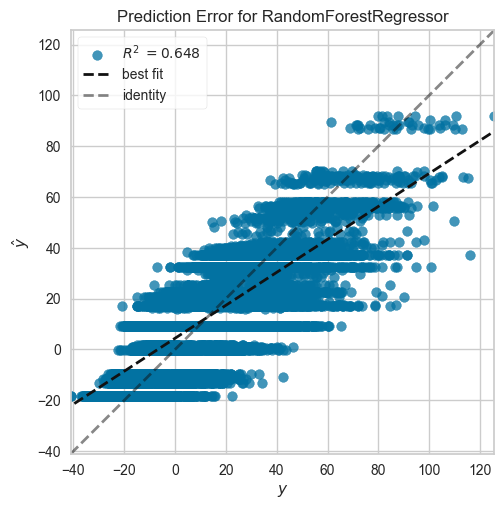

In [39]:
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(modelo,X_train, y_train, X_test, y_test)

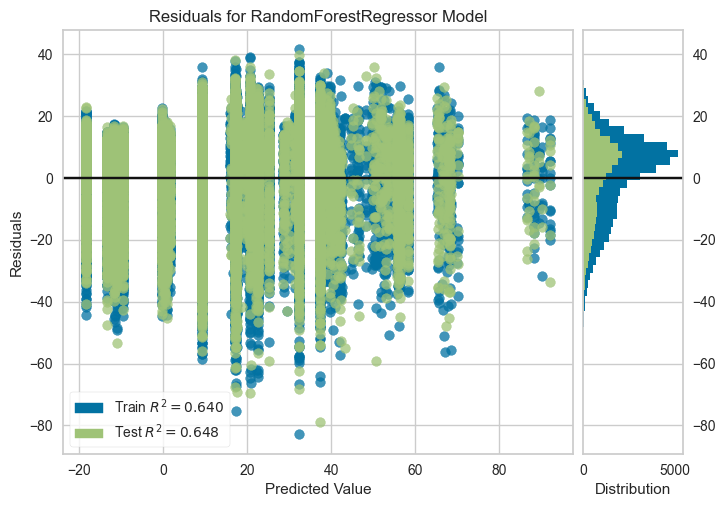

In [40]:
from yellowbrick.regressor import residuals_plot
viz = residuals_plot(modelo, X_train, y_train, X_test, y_test);